# Question 1

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

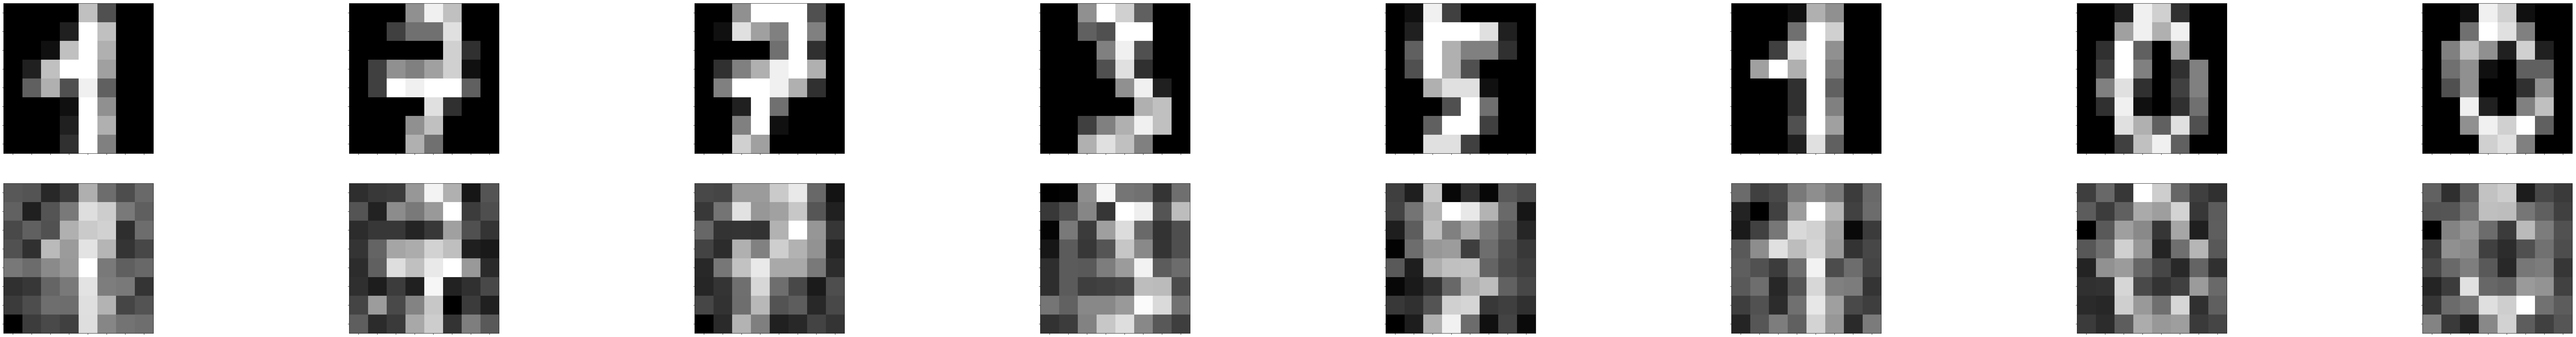

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# fluctuate each pixel's intensity by drawing from a gaussian
# with mean equal to the pixels value and std=4
np.random.seed(42)
noisy = np.random.normal(digits.data, 3)

n_images = 8
fig, axs = plt.subplots(2, 8, figsize=(n_images * 15, 15))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(digits.images[42+i], cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # reconstruction
    ax = axs[1, i]
    ax.imshow(noisy[42+i].reshape(8, 8), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

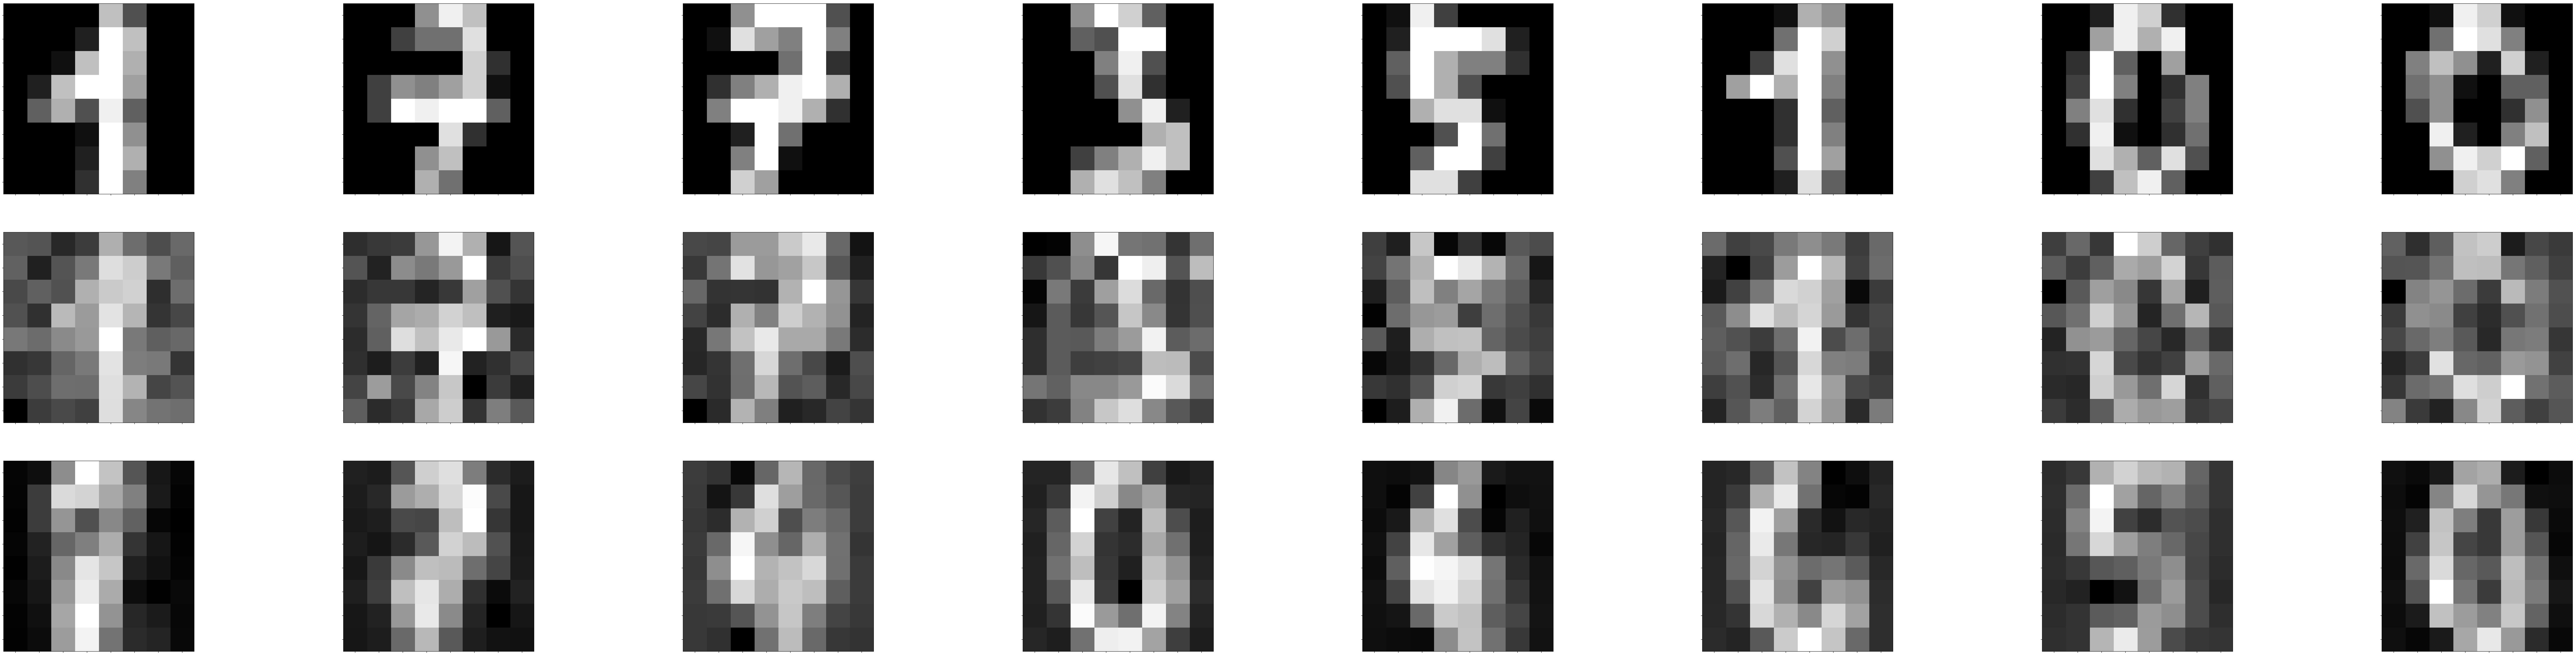

In [10]:
#Split the data in train and test samples
X_train, X_test, y_train, y_test = train_test_split(
    noisy, digits.target, train_size=0.9, random_state=4)

from sklearn.decomposition import PCA

pca = PCA(5)
pca.fit(X_train)

X_pca = pca.transform(X_train)
X_new = pca.inverse_transform(X_pca)

n_images = 8
fig, axs = plt.subplots(3, 8, figsize=(n_images * 15, 30))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(digits.images[42+i], cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    # original
    ax = axs[1, i]
    ax.imshow(noisy[42+i].reshape(8, 8), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # reconstruction
    ax = axs[2, i]
    ax.imshow(X_new[42+i].reshape(8, 8), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

With around 10 components, the noise reduction is rather good but the reconstruction is not so accurate. Even with a number of components of 60 (very close to the maximum 64), the reconstruction does not always get the number right.

# Question 2

The data set as well as the two principle components PCA finds are shown on the plot below.

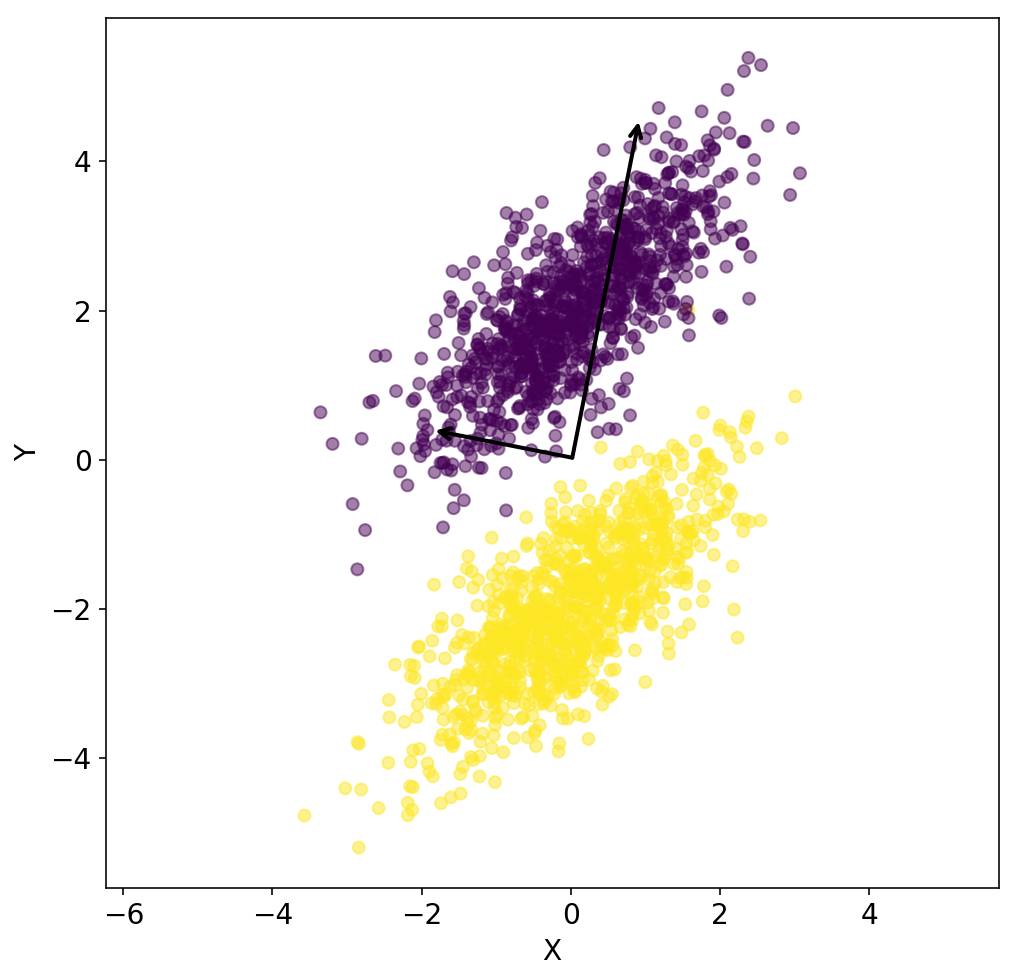

In [6]:
N = 1000
m1 = (1,1)
m2 = (1,4)
C = ((1,0.75), (0.75,1))
g1 = np.random.multivariate_normal((0, -2), C, N)
g2 = np.random.multivariate_normal((0, +2), C, N)

X = np.vstack((g1, g2))
y = np.hstack((np.ones(N), np.zeros(N)))

pca = PCA(2)
pca.fit(X)

X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, label='Original');
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2* np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.xlabel("X")
plt.ylabel("Y")
#plt.legend(loc='best')
plt.axis('equal');

The data is know transformed along the first principle component, and it appears that the data can not be separated anymore because the yellow and violet categories mix.

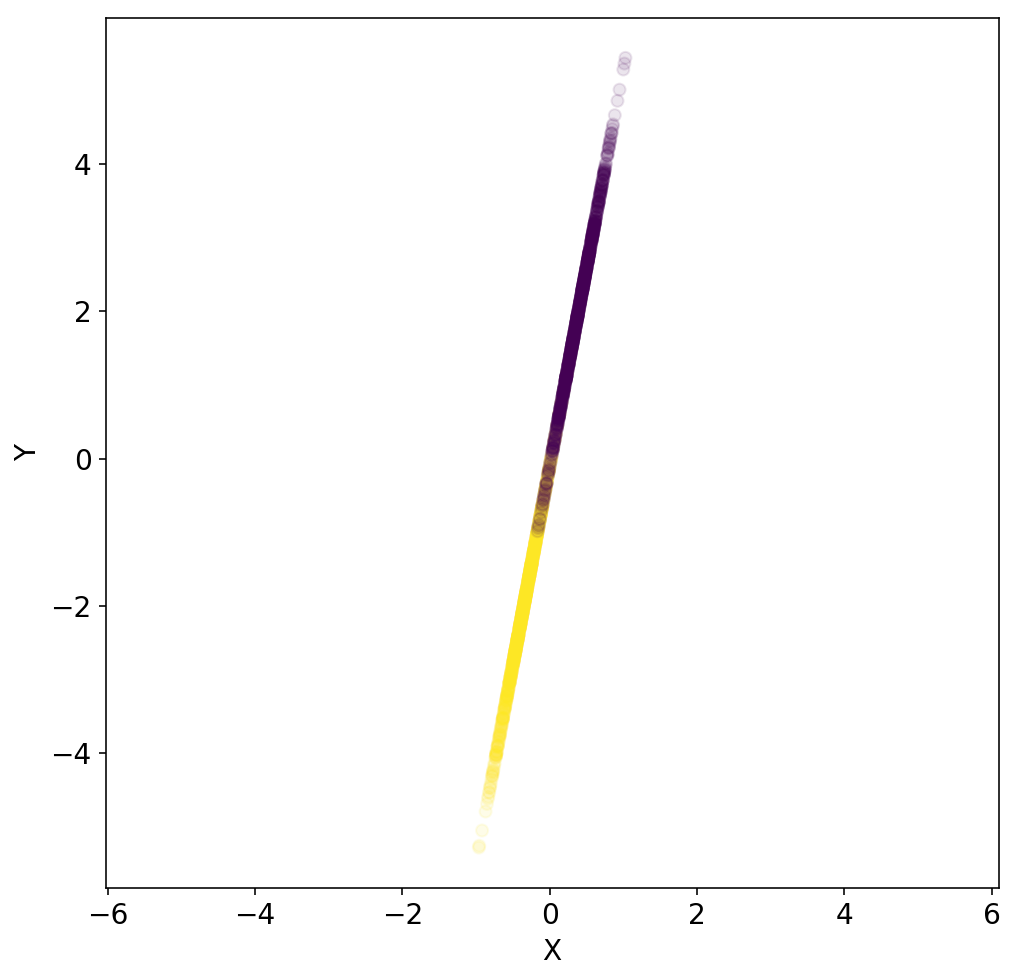

In [7]:
N = 1000
m1 = (1,1)
m2 = (1,4)
C = ((1,0.75), (0.75,1))
g1 = np.random.multivariate_normal((0, -2), C, N)
g2 = np.random.multivariate_normal((0, +2), C, N)

X = np.vstack((g1, g2))
y = np.hstack((np.ones(N), np.zeros(N)))

pca = PCA(1)
pca.fit(X)

X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)

#plt.scatter(X[:,0], X[:,1], c=y,  alpha=0.1, label = 'Original');
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, alpha=0.1)
plt.xlabel("X")
plt.ylabel("Y")
#plt.legend(loc='best')
plt.axis('equal');

As can be seen below, the LDA performs well on this problem (with a very high accuracy on the test sample).

0.999


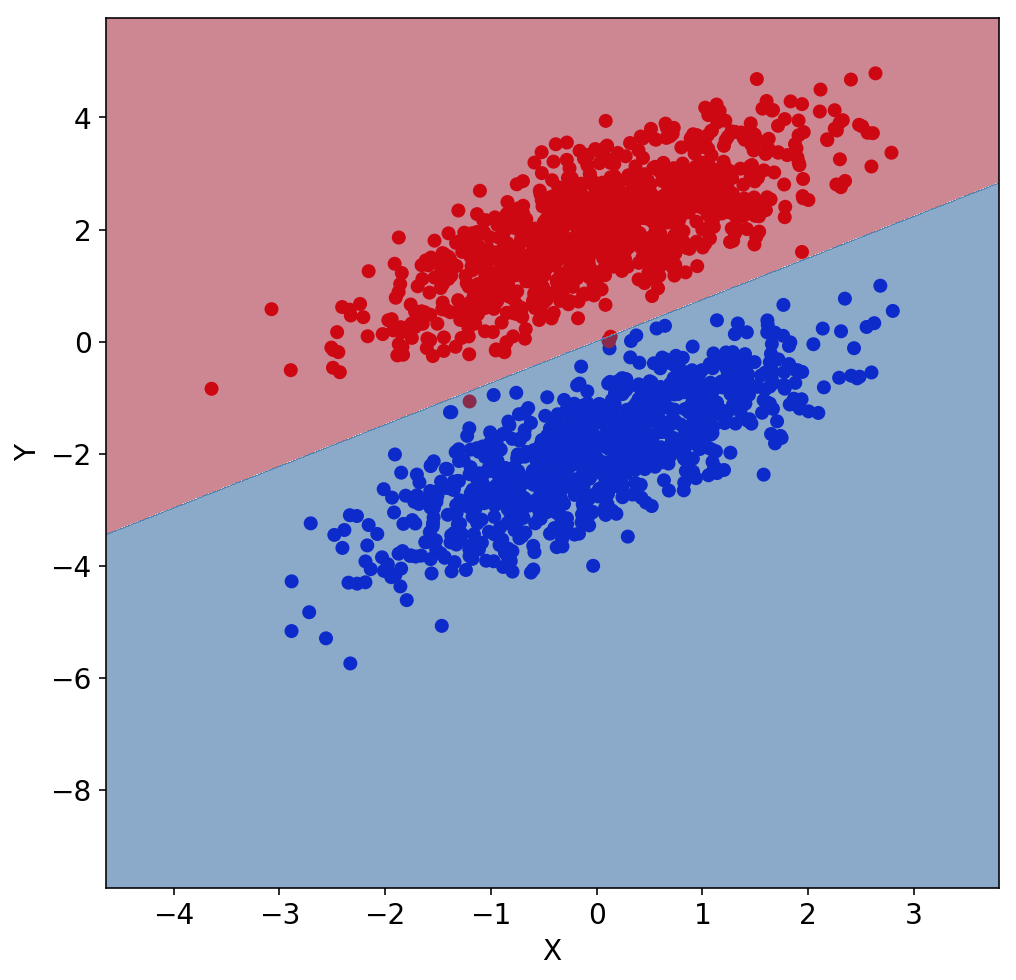

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


N = 1000
m1 = (1,1)
m2 = (1,4)
C = ((1,0.75), (0.75,1))
g1 = np.random.multivariate_normal((0, -2), C, N)
g2 = np.random.multivariate_normal((0, +2), C, N)

X = np.vstack((g1, g2))
y = np.hstack((np.ones(N), np.zeros(N)))

#Split the data in train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=4)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))

# build our grid of values
h = 0.01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 4, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()

labelsS = ['b', 'r']
y = np.take(labelsS, (y < 0.5))
plt.scatter(X[:,0], X[:,1], c=y, label = 'Original');

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)

plt.xlabel("X")
plt.ylabel("Y")

The PCA does not perform well on this data set because the direction of maximal dispersion of the data is not the most discriminating direction. Here, the PCA is limited by the fact that it ignores labels, which is not the case of the LDA.

# Question 3

Here, we construct a more involved neural network starting from the one presented in the course. However, instead of using X_train as an input and an output, we use the noisy training set as an input and the training set as an output because the goal of this network is to remove the noise. As can be seen below, the noise reduction and the reconstruction are both very good.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Dense, Dropout, Flatten, Activation, Input, Dense
from keras.models import Model
from keras.datasets import mnist

# note: the MNIST dataset has more features and more samples than the digits
# dataset in scikit-learn
# Only load the training images, we don't need more and we do not care for the labels
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.75
X_train_noise = X_train + noise_factor * np.random.normal(scale=1.0, size=X_train.shape) 
X_test_noise = X_test + noise_factor * np.random.normal(scale=1.0, size=X_test.shape) 

X_train_noise = np.clip(X_train_noise, 0., 1.)
X_test_noise = np.clip(X_test_noise, 0., 1.)


input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
n_dim = 38

encoded = Conv2D(n_dim, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(n_dim, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

# at this point the representation is (7, 7, 32)

decoded = Conv2D(n_dim, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(n_dim, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

model = autoencoder.fit(X_train_noise, X_train,
                        epochs=50,
                        batch_size=256,
                        shuffle=True,
                        verbose=False,
                        validation_data=(X_test_noise, X_test))

print('final validation loss (MSE):', model.history['val_loss'][-1])

Using TensorFlow backend.


final validation loss (MSE): 0.127358245873


In [9]:
# shortcut to perform just the encoding
#encoder = Model(input_img, encoded)
encoder = Model(input_img, encoded)
X_encoded = encoder.predict(X_test)

print (X_encoded.shape)

# shortcut to perform just the decoding step
encoded_input = Input(shape=(7, 7, 38))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

X_decoded = decoder.predict(X_encoded)
print (X_decoded.shape)

(10000, 7, 7, 38)
(10000, 7, 7, 1)


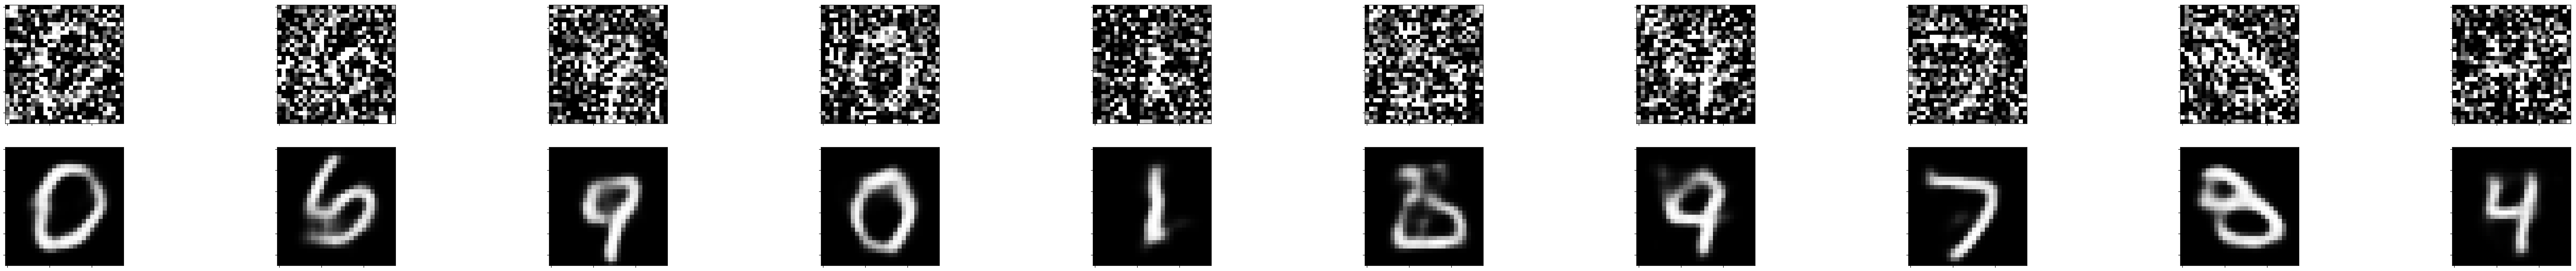

In [12]:
X_decoded = autoencoder.predict(X_test_noise)

n_images = 10
fig, axs = plt.subplots(2, 10, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(X_test_noise[i+10].reshape(28,28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # reconstruction
    ax = axs[1, i]
    ax.imshow(X_decoded[i+10].reshape(28,28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])